In [1]:
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### We load in the data using all the columns, and we delete the outliers

In [2]:
# The columns that we will use 
X_cols = ['S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2', 'D_46', 'D_47', 'D_48', 'D_49', 'B_6', 'B_7', 'B_8', 'D_50', 'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11', 'S_6', 'D_54', 'R_4', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13', 'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15', 'S_11', 'D_62', 'D_63', 'D_64', 'D_65', 'B_16', 'B_17', 'B_18', 'B_19', 'D_66', 'B_20', 'D_68', 'S_12', 'R_6', 'S_13', 'B_21', 'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23', 'D_73', 'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25', 'B_26', 'D_78', 'D_79', 'R_8', 'R_9', 'S_16', 'D_80', 'R_10', 'R_11', 'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13', 'D_83', 'R_14', 'R_15', 'D_84', 'R_16', 'B_29', 'B_30', 'S_18', 'D_86', 'D_87', 'R_17', 'R_18', 'D_88', 'B_31', 'S_19', 'R_19', 'B_32', 'S_20', 'R_20', 'R_21', 'B_33', 'D_89', 'R_22', 'R_23', 'D_91', 'D_92', 'D_93', 'D_94', 'R_24', 'R_25', 'D_96', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'D_102', 'D_103', 'D_104', 'D_105', 'D_106', 'D_107', 'B_36', 'B_37', 'R_26', 'R_27', 'B_38', 'D_108', 'D_109', 'D_110', 'D_111', 'B_39', 'D_112', 'B_40', 'S_27', 'D_113', 'D_114', 'D_115', 'D_116', 'D_117', 'D_118', 'D_119', 'D_120', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125', 'D_126', 'D_127', 'D_128', 'D_129', 'B_41', 'B_42', 'D_130', 'D_131', 'D_132', 'D_133', 'R_28', 'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144', 'D_145']

In [3]:
# The columns that are outliers
get_rid_of_columns = ['B_5','D_49','B_6','D_50', 'S_5','B_12', 'B_13','D_65', 'S_12','D_69',
                    'B_26','B_27','R_14', 'R_18','S_23','S_26','D_106', 'B_40','D_123'] 

In [4]:
# The columns that we will not use 
not_use_columns = ['S_2','B_30','B_38','D_114','D_116','D_117','D_120','D_126','D_63','D_64','D_66','D_68']

In [5]:
# For loop for removing the columns
for removing in get_rid_of_columns:
    X_cols.remove(removing)

In [6]:
# For loop for removing columns that we will not need
for removing_ in not_use_columns:
    X_cols.remove(removing_)

In [7]:
len(X_cols) # We have removed 31 colums which is not_use_columns + get_rid_of_columns length

158

### We will now load in the data

In [8]:
chunksize = 1000000 # How much of the data to load in

# Load in using X_cols and customer_ID
train_df_iter = pd.read_csv("train_data.csv", chunksize=chunksize, usecols=["customer_ID"] + X_cols)


train_df = pd.DataFrame()
for i_chunk, chunk in enumerate(train_df_iter): # i_chunk is the index of the chunk, and chunk is the actual data
    train_df = pd.concat([train_df, chunk]) # adding it to train_df which is an empty dataframe
    print(train_df.shape)

(1000000, 159)
(2000000, 159)
(3000000, 159)
(4000000, 159)
(5000000, 159)
(5531451, 159)


In [9]:
train_df_labels = pd.read_csv("train_labels.csv")

##### Light EDA

In [10]:
train_df.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,5.485466e+06,5.531451e+06,5.531451e+06,5.529435e+06,5.531451e+06,4.510907e+06,5.529435e+06,5.529435e+06,791314.000000,3.873055e+06,...,1.946990e+05,1.946990e+05,1.946990e+05,5.429903e+06,5.490819e+06,5.429903e+06,944408.000000,5.429903e+06,5.490724e+06,5.429903e+06
mean,6.563340e-01,1.531172e-01,1.240100e-01,6.214887e-01,7.880270e-02,2.258455e-01,5.978469e-02,1.325389e-01,0.184974,1.546841e-01,...,2.427725e-01,1.424409e-02,1.646183e-01,1.789305e-01,2.664348e-02,1.645212e-01,0.390799,1.788022e-01,5.238952e-02,6.233496e-02
std,2.446494e-01,2.700709e-01,2.119869e-01,4.014877e-01,2.263971e-01,1.933475e-01,2.025443e-01,2.349929e-01,0.228185,2.133977e-01,...,2.101320e-01,9.571115e-02,2.670208e-01,3.790614e-01,1.455480e-01,3.482771e-01,0.236182,3.789498e-01,1.825135e-01,1.934937e-01
min,-4.589548e-01,5.026190e-09,-7.588799e+00,9.192280e-09,1.534223e-09,-6.271320e-01,5.566545e-10,6.285293e-09,-0.000454,1.154550e-07,...,6.316773e-08,1.078787e-08,3.307923e-08,3.767347e-10,3.725073e-09,1.650100e-10,-0.014539,5.549692e-09,2.500991e-09,1.226024e-09
25%,4.803307e-01,4.528464e-03,8.863645e-03,1.053313e-01,2.895934e-03,1.272588e-01,2.873244e-03,5.227570e-03,0.037516,4.227546e-02,...,9.314305e-03,2.532470e-03,3.517452e-03,3.027212e-03,2.555848e-03,3.026087e-03,0.199399,3.028116e-03,2.752896e-03,3.028347e-03
50%,6.942950e-01,9.056902e-03,3.132968e-02,8.143328e-01,5.782230e-03,1.639082e-01,5.746725e-03,9.777230e-03,0.120519,8.851245e-02,...,2.539468e-01,5.069830e-03,7.037814e-03,6.053010e-03,5.110523e-03,6.051590e-03,0.382136,6.053151e-03,5.508129e-03,6.053248e-03
75%,8.648159e-01,2.366407e-01,1.259019e-01,1.002403e+00,8.660590e-03,2.581017e-01,8.615665e-03,1.550507e-01,0.250869,1.843206e-01,...,2.582450e-01,7.573434e-03,5.015468e-01,9.080455e-03,7.663697e-03,9.078915e-03,0.559308,9.076287e-03,8.260447e-03,9.080930e-03
max,1.010000e+00,5.389619e+00,1.324060e+00,1.010000e+00,3.256284e+00,5.482888e+00,8.988807e+00,1.625262e+00,4.191119,1.011162e+01,...,1.759910e+00,1.009998e+00,3.005383e+00,1.010000e+00,1.010000e+00,1.339910e+00,2.229368,1.010000e+00,1.343331e+00,4.827630e+00


(array([5.458903e+06, 5.980000e+04, 8.737000e+03, 1.491000e+03,
        3.390000e+02, 1.140000e+02, 2.800000e+01, 1.700000e+01,
        5.000000e+00, 1.000000e+00]),
 array([5.56654507e-10, 8.98880704e-01, 1.79776141e+00, 2.69664211e+00,
        3.59552281e+00, 4.49440352e+00, 5.39328422e+00, 6.29216492e+00,
        7.19104563e+00, 8.08992633e+00, 8.98880703e+00]),
 <BarContainer object of 10 artists>)

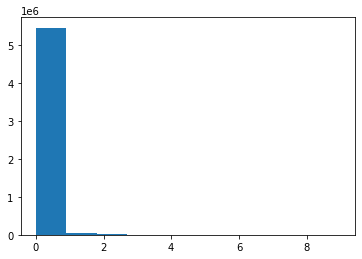

In [11]:
plt.hist(train_df["D_41"]) # The D_ have majority positive numbers

(array([2.260000e+02, 6.079000e+03, 3.795900e+04, 1.002180e+05,
        2.581140e+05, 6.366660e+05, 8.808930e+05, 9.694700e+05,
        1.207461e+06, 1.388380e+06]),
 array([-0.45895483, -0.31205936, -0.16516388, -0.0182684 ,  0.12862708,
         0.27552256,  0.42241804,  0.56931351,  0.71620899,  0.86310447,
         1.00999995]),
 <BarContainer object of 10 artists>)

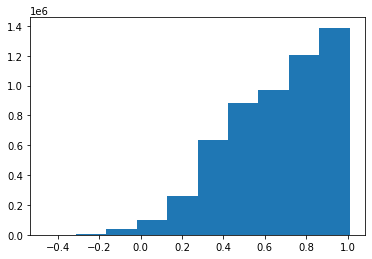

In [12]:
plt.hist(train_df["P_2"]) # The P_ (spending) are majority increasing and a steady rate

(array([1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 4.000000e+00, 3.500000e+01,
        5.037944e+06, 4.934660e+05]),
 array([-7.5887991 , -6.69751315, -5.8062272 , -4.91494125, -4.0236553 ,
        -3.13236935, -2.2410834 , -1.34979745, -0.4585115 ,  0.43277445,
         1.3240604 ]),
 <BarContainer object of 10 artists>)

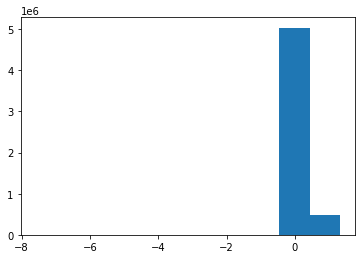

In [13]:
plt.hist(train_df["B_1"]) # Between -1 and 1

### We will join the data with the labels and make it smaller by using the .groupby().last().reset_index()

In [14]:
train_df = train_df.groupby("customer_ID")[X_cols].last().reset_index() # reset the index from (5531451, 159) to (458913, 159)

In [15]:
train_df.shape

(458913, 159)

In [16]:
train_df_labels.shape

(458913, 2)

In [17]:
# fill in the NaN values

print(f"Before fillna {train_df.isna().sum()}")
# Hard fillna (CHECK IF RESULTS ARE BAD)
train_df.fillna(0, inplace = True)

print(f"After fillna {train_df.isna().sum()}")

Before fillna customer_ID         0
P_2              2434
D_39                0
B_1                 0
B_2                31
                ...  
D_141            2532
D_142          373333
D_143            2532
D_144               0
D_145            2532
Length: 159, dtype: int64
After fillna customer_ID    0
P_2            0
D_39           0
B_1            0
B_2            0
              ..
D_141          0
D_142          0
D_143          0
D_144          0
D_145          0
Length: 159, dtype: int64


In [18]:
# merging the data
train_df = pd.merge(train_df, train_df_labels, on="customer_ID", how="left")

In [19]:
train_df

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,0.0,...,0.0,0.0,0.007186,0.004234,0.005086,0.000000,0.005810,0.002970,0.008533,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.880519,0.178126,0.034684,1.004028,0.006911,0.165509,0.005552,0.005068,0.0,...,0.0,0.0,0.002980,0.007479,0.007870,0.000000,0.003284,0.003169,0.008514,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.880875,0.009704,0.004284,0.812650,0.006450,0.000000,0.003796,0.007196,0.0,...,0.0,0.0,0.007383,0.006623,0.000964,0.000000,0.002202,0.000834,0.003444,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.621776,0.001083,0.012564,1.006183,0.007829,0.287766,0.004532,0.009937,0.0,...,0.0,0.0,0.002704,0.006184,0.001899,0.000000,0.008183,0.005560,0.002983,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.871900,0.005573,0.007679,0.815746,0.001247,0.176403,0.000231,0.005528,0.0,...,0.0,0.0,0.002974,0.004162,0.005764,0.000000,0.008154,0.006944,0.000905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0.844229,0.447585,0.028515,1.009867,0.001928,0.128707,0.003482,0.005893,0.0,...,0.0,0.0,0.007917,0.001520,0.005530,0.000000,0.001430,0.003009,0.004843,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.831279,0.033670,0.292360,0.055656,0.006953,0.194697,0.005791,0.233078,0.0,...,0.0,0.0,0.004393,0.006185,0.001480,0.000000,0.004794,0.009230,0.006435,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0.800522,0.267018,0.020563,1.007023,0.000957,0.066648,0.007424,0.006314,0.0,...,0.0,0.0,0.006035,0.002869,0.002149,0.000000,0.008031,0.000340,0.002148,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,0.754129,0.008619,0.015838,0.714486,0.000993,0.408849,0.003392,0.050048,0.0,...,0.0,0.0,1.009894,0.004478,0.949723,0.446255,1.009310,0.002502,0.185527,1


### We will now train_test_split the data with KFold

In [20]:
# These are the columns that we will use for the training 
_X_cols = train_df.columns[1:-1] # We get rid of the customer ID and the 
_X_cols.shape

(158,)

In [21]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 3)

for train_index, val_index in kf.split(train_df[_X_cols]):
    X_train = train_df[_X_cols].iloc[train_index]
    X_test = train_df[_X_cols].iloc[val_index]
    y_train = train_df["target"].iloc[train_index]
    y_test = train_df["target"].iloc[val_index]

#### Now we will use an CatBoostClassifier

In [26]:
import catboost

model = catboost.CatBoostClassifier()

In [27]:
model.fit(X_train, y_train)

Learning rate set to 0.118659
0:	learn: 0.5646030	total: 124ms	remaining: 2m 4s
1:	learn: 0.4788980	total: 190ms	remaining: 1m 35s
2:	learn: 0.4148286	total: 259ms	remaining: 1m 26s
3:	learn: 0.3690884	total: 323ms	remaining: 1m 20s
4:	learn: 0.3432075	total: 391ms	remaining: 1m 17s
5:	learn: 0.3223974	total: 462ms	remaining: 1m 16s
6:	learn: 0.3057451	total: 526ms	remaining: 1m 14s
7:	learn: 0.2946361	total: 580ms	remaining: 1m 11s
8:	learn: 0.2844271	total: 658ms	remaining: 1m 12s
9:	learn: 0.2777000	total: 712ms	remaining: 1m 10s
10:	learn: 0.2730727	total: 763ms	remaining: 1m 8s
11:	learn: 0.2682619	total: 820ms	remaining: 1m 7s
12:	learn: 0.2645481	total: 877ms	remaining: 1m 6s
13:	learn: 0.2606296	total: 937ms	remaining: 1m 5s
14:	learn: 0.2577722	total: 990ms	remaining: 1m 5s
15:	learn: 0.2555529	total: 1.04s	remaining: 1m 3s
16:	learn: 0.2538032	total: 1.09s	remaining: 1m 3s
17:	learn: 0.2519236	total: 1.15s	remaining: 1m 2s
18:	learn: 0.2505065	total: 1.2s	remaining: 1m 2s
19:

162:	learn: 0.2218951	total: 9.56s	remaining: 49.1s
163:	learn: 0.2218328	total: 9.62s	remaining: 49s
164:	learn: 0.2217707	total: 9.68s	remaining: 49s
165:	learn: 0.2217106	total: 9.74s	remaining: 48.9s
166:	learn: 0.2216427	total: 9.8s	remaining: 48.9s
167:	learn: 0.2215851	total: 9.85s	remaining: 48.8s
168:	learn: 0.2215228	total: 9.91s	remaining: 48.7s
169:	learn: 0.2214542	total: 9.96s	remaining: 48.6s
170:	learn: 0.2213806	total: 10s	remaining: 48.6s
171:	learn: 0.2212991	total: 10.1s	remaining: 48.5s
172:	learn: 0.2212513	total: 10.1s	remaining: 48.4s
173:	learn: 0.2211887	total: 10.2s	remaining: 48.3s
174:	learn: 0.2211398	total: 10.2s	remaining: 48.2s
175:	learn: 0.2210604	total: 10.3s	remaining: 48.1s
176:	learn: 0.2210067	total: 10.3s	remaining: 48s
177:	learn: 0.2209290	total: 10.4s	remaining: 48s
178:	learn: 0.2208566	total: 10.4s	remaining: 47.9s
179:	learn: 0.2207825	total: 10.5s	remaining: 47.8s
180:	learn: 0.2207085	total: 10.5s	remaining: 47.7s
181:	learn: 0.2206359	t

324:	learn: 0.2120433	total: 18.9s	remaining: 39.2s
325:	learn: 0.2120003	total: 19s	remaining: 39.2s
326:	learn: 0.2119602	total: 19s	remaining: 39.1s
327:	learn: 0.2119130	total: 19.1s	remaining: 39.1s
328:	learn: 0.2118584	total: 19.1s	remaining: 39s
329:	learn: 0.2118095	total: 19.2s	remaining: 38.9s
330:	learn: 0.2117541	total: 19.2s	remaining: 38.9s
331:	learn: 0.2116976	total: 19.3s	remaining: 38.8s
332:	learn: 0.2116399	total: 19.4s	remaining: 38.8s
333:	learn: 0.2115878	total: 19.4s	remaining: 38.7s
334:	learn: 0.2115367	total: 19.5s	remaining: 38.7s
335:	learn: 0.2114862	total: 19.5s	remaining: 38.6s
336:	learn: 0.2114439	total: 19.6s	remaining: 38.6s
337:	learn: 0.2113866	total: 19.7s	remaining: 38.5s
338:	learn: 0.2113426	total: 19.7s	remaining: 38.4s
339:	learn: 0.2112903	total: 19.8s	remaining: 38.3s
340:	learn: 0.2112443	total: 19.8s	remaining: 38.3s
341:	learn: 0.2111791	total: 19.9s	remaining: 38.2s
342:	learn: 0.2111530	total: 19.9s	remaining: 38.1s
343:	learn: 0.2110

483:	learn: 0.2041180	total: 27.8s	remaining: 29.6s
484:	learn: 0.2040655	total: 27.9s	remaining: 29.6s
485:	learn: 0.2040157	total: 27.9s	remaining: 29.5s
486:	learn: 0.2039676	total: 28s	remaining: 29.5s
487:	learn: 0.2039209	total: 28s	remaining: 29.4s
488:	learn: 0.2038853	total: 28.1s	remaining: 29.3s
489:	learn: 0.2038439	total: 28.1s	remaining: 29.3s
490:	learn: 0.2037906	total: 28.2s	remaining: 29.2s
491:	learn: 0.2037403	total: 28.2s	remaining: 29.2s
492:	learn: 0.2037095	total: 28.3s	remaining: 29.1s
493:	learn: 0.2036638	total: 28.3s	remaining: 29s
494:	learn: 0.2036206	total: 28.4s	remaining: 29s
495:	learn: 0.2035650	total: 28.4s	remaining: 28.9s
496:	learn: 0.2035197	total: 28.5s	remaining: 28.9s
497:	learn: 0.2034631	total: 28.6s	remaining: 28.8s
498:	learn: 0.2034157	total: 28.6s	remaining: 28.7s
499:	learn: 0.2033687	total: 28.7s	remaining: 28.7s
500:	learn: 0.2033238	total: 28.7s	remaining: 28.6s
501:	learn: 0.2032762	total: 28.8s	remaining: 28.6s
502:	learn: 0.203227

643:	learn: 0.1968736	total: 36.9s	remaining: 20.4s
644:	learn: 0.1968284	total: 37s	remaining: 20.3s
645:	learn: 0.1967867	total: 37s	remaining: 20.3s
646:	learn: 0.1967346	total: 37.1s	remaining: 20.2s
647:	learn: 0.1966791	total: 37.1s	remaining: 20.2s
648:	learn: 0.1966294	total: 37.2s	remaining: 20.1s
649:	learn: 0.1965852	total: 37.2s	remaining: 20.1s
650:	learn: 0.1965452	total: 37.3s	remaining: 20s
651:	learn: 0.1965003	total: 37.3s	remaining: 19.9s
652:	learn: 0.1964729	total: 37.4s	remaining: 19.9s
653:	learn: 0.1964287	total: 37.4s	remaining: 19.8s
654:	learn: 0.1964035	total: 37.5s	remaining: 19.7s
655:	learn: 0.1963583	total: 37.5s	remaining: 19.7s
656:	learn: 0.1963059	total: 37.6s	remaining: 19.6s
657:	learn: 0.1962587	total: 37.7s	remaining: 19.6s
658:	learn: 0.1962188	total: 37.7s	remaining: 19.5s
659:	learn: 0.1961704	total: 37.8s	remaining: 19.5s
660:	learn: 0.1961226	total: 37.8s	remaining: 19.4s
661:	learn: 0.1960750	total: 37.9s	remaining: 19.3s
662:	learn: 0.1960

804:	learn: 0.1900433	total: 45.7s	remaining: 11.1s
805:	learn: 0.1900089	total: 45.8s	remaining: 11s
806:	learn: 0.1899701	total: 45.8s	remaining: 11s
807:	learn: 0.1899329	total: 45.9s	remaining: 10.9s
808:	learn: 0.1898896	total: 45.9s	remaining: 10.8s
809:	learn: 0.1898494	total: 46s	remaining: 10.8s
810:	learn: 0.1898103	total: 46s	remaining: 10.7s
811:	learn: 0.1897665	total: 46.1s	remaining: 10.7s
812:	learn: 0.1897199	total: 46.1s	remaining: 10.6s
813:	learn: 0.1896737	total: 46.2s	remaining: 10.6s
814:	learn: 0.1896220	total: 46.3s	remaining: 10.5s
815:	learn: 0.1895851	total: 46.3s	remaining: 10.4s
816:	learn: 0.1895350	total: 46.4s	remaining: 10.4s
817:	learn: 0.1895104	total: 46.4s	remaining: 10.3s
818:	learn: 0.1894650	total: 46.5s	remaining: 10.3s
819:	learn: 0.1894244	total: 46.5s	remaining: 10.2s
820:	learn: 0.1893850	total: 46.6s	remaining: 10.2s
821:	learn: 0.1893420	total: 46.6s	remaining: 10.1s
822:	learn: 0.1892948	total: 46.7s	remaining: 10s
823:	learn: 0.1892542	

964:	learn: 0.1837410	total: 54.3s	remaining: 1.97s
965:	learn: 0.1837026	total: 54.4s	remaining: 1.91s
966:	learn: 0.1836671	total: 54.5s	remaining: 1.86s
967:	learn: 0.1836310	total: 54.5s	remaining: 1.8s
968:	learn: 0.1835872	total: 54.6s	remaining: 1.75s
969:	learn: 0.1835528	total: 54.6s	remaining: 1.69s
970:	learn: 0.1835030	total: 54.7s	remaining: 1.63s
971:	learn: 0.1834555	total: 54.7s	remaining: 1.58s
972:	learn: 0.1834309	total: 54.8s	remaining: 1.52s
973:	learn: 0.1833951	total: 54.8s	remaining: 1.46s
974:	learn: 0.1833680	total: 54.9s	remaining: 1.41s
975:	learn: 0.1833258	total: 54.9s	remaining: 1.35s
976:	learn: 0.1833006	total: 55s	remaining: 1.29s
977:	learn: 0.1832628	total: 55s	remaining: 1.24s
978:	learn: 0.1832162	total: 55.1s	remaining: 1.18s
979:	learn: 0.1831795	total: 55.2s	remaining: 1.13s
980:	learn: 0.1831408	total: 55.2s	remaining: 1.07s
981:	learn: 0.1831018	total: 55.3s	remaining: 1.01s
982:	learn: 0.1830767	total: 55.3s	remaining: 957ms
983:	learn: 0.183

### We will run predictions on the test dataset and turn it into a CSV file

In [28]:
chunksize = 1000000

test_df_iter = pd.read_csv("test_data.csv", chunksize=chunksize, usecols=["customer_ID"] + X_cols) # Load with same columns as the train_data

In [29]:
_index = []
_vals = []

for chunk in test_df_iter:
    _chunk = chunk.groupby("customer_ID")[X_cols].last().reset_index()# Just reseting the index


    X_test = _chunk[_X_cols] 
    X_test = X_test.fillna(0)
    y_test_pred = model.predict_proba(X_test)[:, 1]
    _index.extend(_chunk["customer_ID"])
    _vals.extend(y_test_pred)
    
    print(len(_index))

81358
162618
244059
325450
406815
488260
569555
650904
732217
813543
895040
924631


In [30]:
res_df = pd.DataFrame(
    {"customer_ID": _index, "prediction": np.squeeze(_vals)}
).groupby("customer_ID")["prediction"].mean().reset_index()

In [31]:
res_df.isna().sum()

customer_ID    0
prediction     0
dtype: int64

In [32]:
res_df.head()

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.023227
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.002985
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.049396
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.312266
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.741175


In [33]:
res_df.to_csv("catboostingclassifier(without_categorical_or_outliers)(KFold).csv", index = False)